In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

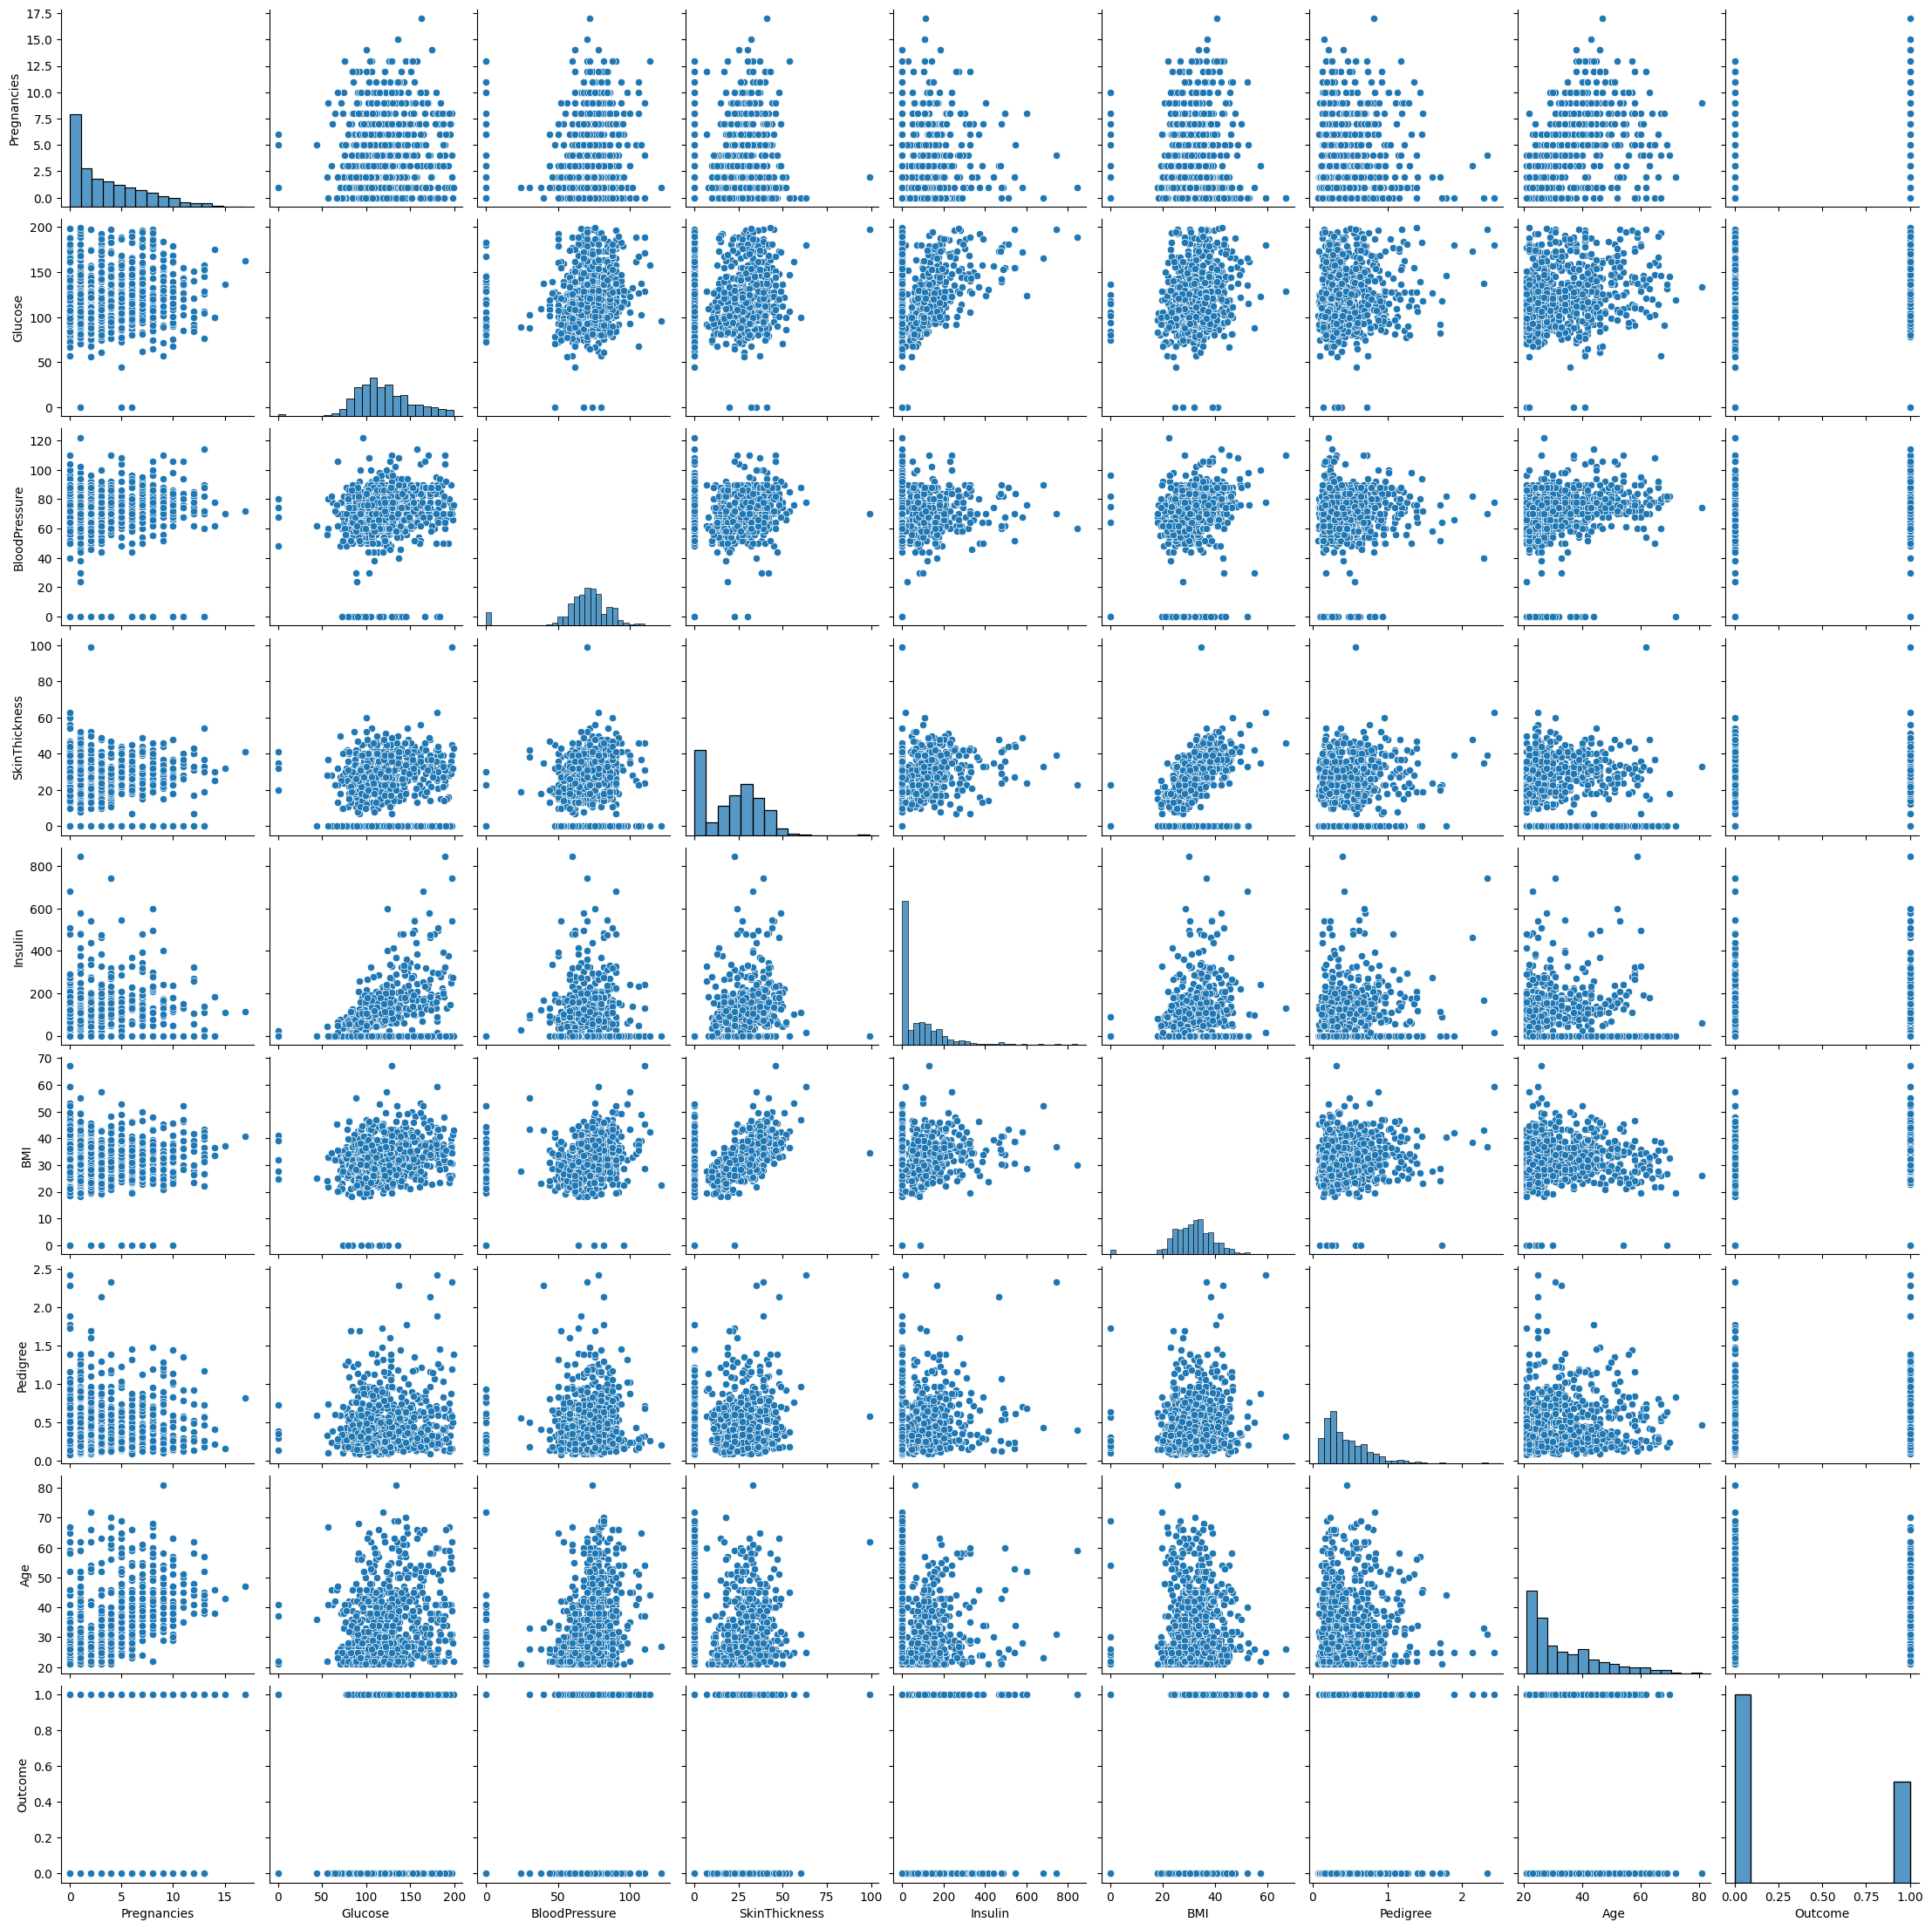

In [7]:
sns.pairplot(df)

<AxesSubplot: >

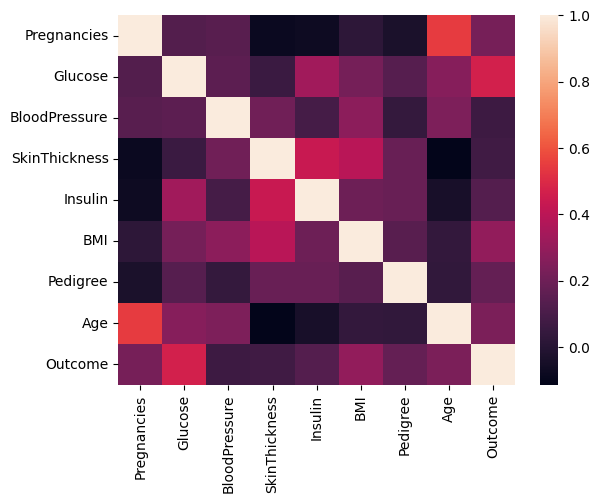

In [8]:
sns.heatmap(df.corr())

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Pedigree',
 'Age',
 'Outcome']

In [11]:
X = df[['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Pedigree',
 'Age']]
Y = df['Outcome']

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtc = DecisionTreeClassifier()

In [15]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
pred = dtc.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[88 19]
 [16 31]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       107
           1       0.62      0.66      0.64        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.78      0.77      0.77       154



In [19]:
from sklearn.tree import plot_tree

In [20]:
plt.figure(figsize=(40,15))
plot_tree(dtc,filled=True)

[Text(0.407047193877551, 0.9642857142857143, 'x[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.1434948979591837, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.05612244897959184, 0.8214285714285714, 'x[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.030612244897959183, 0.75, 'x[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.02040816326530612, 0.6785714285714286, 'x[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.01020408163265306, 0.6071428571428571, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.030612244897959183, 0.6071428571428571, 'x[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.02040816326530612, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04081632653061224, 0.5357142857142857, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.04081632653061224, 0.6785714285714286, 'gini = 0.0\nsamples = 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
prediction = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test,prediction))
print(classification_report(Y_test,prediction))


[[95 12]
 [16 31]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154

